In [38]:
# Code obtained from: 
# https://github.com/oreillymedia/t-SNE-tutorial
# https://www.datacamp.com/community/tutorials/introduction-t-sne

In [34]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

RS = 20191458

In [25]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

## T-SNE

In [20]:
digits = load_digits()

In [23]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [35]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

(<Figure size 576x576 with 1 Axes>,
 [Text(19.038364, 59.703575, '0'),
  Text(-12.236639, -0.097734034, '1'),
  Text(-32.317104, -27.490055, '2'),
  Text(2.298868, -45.609203, '3'),
  Text(-14.824481, 38.768475, '4'),
  Text(41.971344, -10.566088, '5'),
  Text(-51.817017, 12.338738, '6'),
  Text(23.28848, 18.787027, '7'),
  Text(-0.72436374, -15.814224, '8'),
  Text(22.122356, -34.632545, '9')])

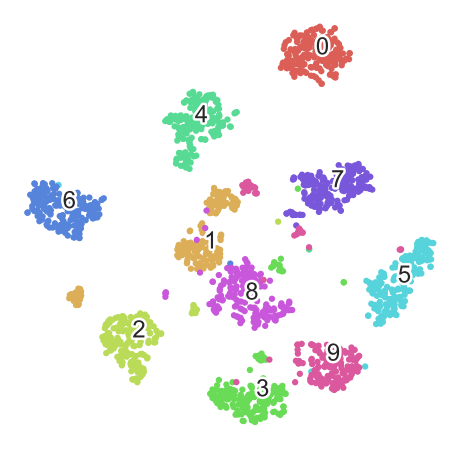

In [26]:
scatter(digits_proj, y)

## PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

In [29]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.14890594 0.13618771 0.11794594 0.08409979]


In [30]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component


(<Figure size 576x576 with 1 Axes>,
 [Text(1.898543169153835, 21.397791927414666, '0'),
  Text(6.19851070561404, -13.622366898541458, '1'),
  Text(-10.633239128090173, -6.866313086869187, '2'),
  Text(-19.649402360613706, 1.6352706702000566, '3'),
  Text(23.39529739386316, -0.5207502335704934, '4'),
  Text(-3.186218424842297, 0.35901132033374183, '5'),
  Text(16.517510652836783, 12.416709998061418, '6'),
  Text(-0.0366450460163189, -16.785952177000013, '7'),
  Text(-0.7915828857626468, -4.99606416483915, '8'),
  Text(-14.592919854450242, 10.640959978366196, '9')])

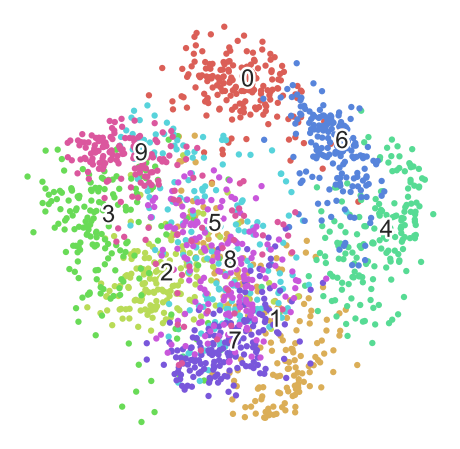

In [31]:
scatter(top_two_comp.values, y)

## PCA + TSNE

In [32]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X)

In [33]:
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative variance explained by 50 principal components: 0.9995471140234812


In [36]:
digits_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

(<Figure size 576x576 with 1 Axes>,
 [Text(-58.35205, 14.933891, '0'),
  Text(16.047024, 12.289913, '1'),
  Text(-31.13135, -47.772964, '2'),
  Text(5.1854925, -36.26597, '3'),
  Text(37.796402, 38.406296, '4'),
  Text(-17.27892, 8.156089, '5'),
  Text(-5.9897933, 48.383, '6'),
  Text(50.554337, -14.249215, '7'),
  Text(12.442899, -8.052162, '8'),
  Text(-11.8511505, -17.941166, '9')])

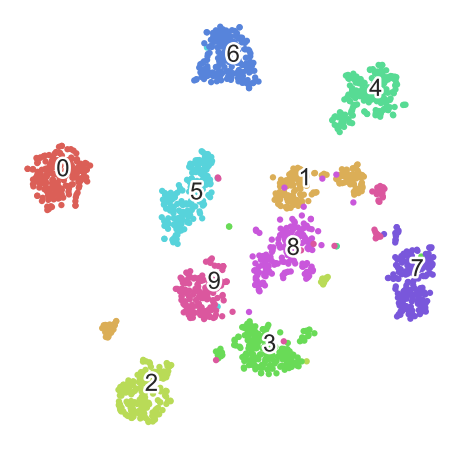

In [37]:
scatter(digits_pca_tsne, y)

In [46]:
import umap.umap_ as umap

In [47]:
reducer = umap.UMAP()

In [48]:
embeddings = reducer.fit_transform(X)

(<Figure size 576x576 with 1 Axes>,
 [Text(15.863882, 0.38689494, '0'),
  Text(0.23862809, 0.24003628, '1'),
  Text(5.3207197, -2.137204, '2'),
  Text(-6.2364583, 2.1564758, '3'),
  Text(5.4880567, 8.751425, '4'),
  Text(-6.094132, -4.184328, '5'),
  Text(1.9176539, -10.352908, '6'),
  Text(-3.2010872, 8.298637, '7'),
  Text(-1.963211, 1.187064, '8'),
  Text(-8.957548, -0.30928785, '9')])

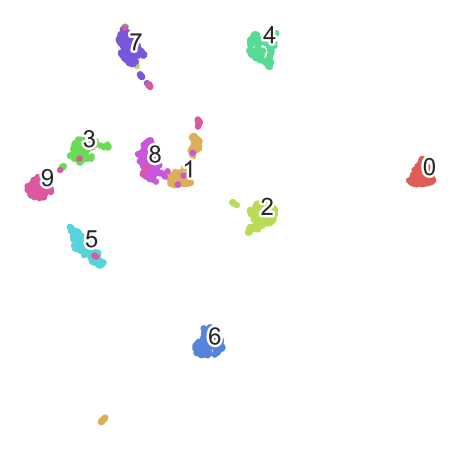

In [49]:
scatter(embeddings, y)